### Group Members

In [13]:
#Imports: all the imports are listed below. 
import numpy as np
import pandas as pd
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from tensorflow.keras import models
from tensorflow.keras import layers

## Reading the dataset - Grades_Dataset.csv

In [14]:
# Reading the dataset.
data = pd.read_csv('The_Grades_Dataset.csv')

# Displaying the Head (Column Names) and '3' rows 
data.head(3)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608


## Checking Unique Values

In [15]:
# Seeking the unique values present in the dataset
print(data['CS-318'].unique())
print(data['MT-222'].unique())
print(data['CS-406'].unique())

['C-' 'A-' 'B+' 'B-' 'C' 'B' 'C+' 'D' 'D+' 'A' nan 'A+' 'WU' 'F' 'W']
['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' nan 'C-' 'WU' 'F' 'A+' 'W']
['A-' 'A' 'B-' 'B' 'B+' nan 'C+' 'D' 'D+' 'C-' 'C' 'A+' 'F' 'W' 'WU']


## Data preprocessing Steps.

## Checking For Null Values 

In [16]:
#displaying the count of null values present in each column. 
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [17]:
#list will return the features that have null values
features_with_null = [features for features in data if data[features].isnull().sum()]
for each_feature in features_with_null:
    data[each_feature] = data[each_feature].fillna(data[each_feature].mode()[0]) #filling each null value present in each column with mode value of its column iteratively. 

## Null Values after getting filled with Mode

In [18]:
#displaying the count of null values present in each column. The count must be zero now. 
data.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

## Storing the updated data to the csv file

In [19]:
data.to_csv('The_Grades_Dataset_Clean.csv')
data = pd.read_csv('The_Grades_Dataset_Clean.csv')
data

,Unnamed: 0,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,1,CS-97002,A,D,D+,D,B-,C,D,A,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,2,CS-97003,A,B,A,B-,B+,A,B-,B+,...,B,B,A,C,A,A,A,A-,A,3.608
3,3,CS-97004,D,C+,D+,D,D,A-,D+,C-,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,CS-97567,B,A,A,A-,A+,A,A-,A-,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,567,CS-97568,A+,A,A,A,A,A,A,A-,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,568,CS-97569,B,A,A-,B+,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,569,CS-97570,A,B+,D,A,D,D+,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


## Dropping the unnecessary columns from dataset.

In [20]:
data.drop(['Seat No.','Unnamed: 0'], axis=1, inplace=True)
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


## Ordinal Encoding

In [21]:
#Seperating the inputs and outputs, so to apply encoding on feature values only. 
Predictors=data.drop("CGPA", axis=1)
target=data["CGPA"]
# print(Predictors)
# print(target)

### After Encoding

In [22]:
#Replacing the string values with integer values with respect to their weightage on CGPA
list(Predictors.columns.values)
Col_list=list(Predictors.columns)
for Col in Col_list:
    Predictors[Col]=Predictors[Col].replace('A+',4.0)
    Predictors[Col]=Predictors[Col].replace('A',4.0)
    Predictors[Col]=Predictors[Col].replace('A-',3.7)
    Predictors[Col]=Predictors[Col].replace('B+',3.4)
    Predictors[Col]=Predictors[Col].replace('B',3.0)
    Predictors[Col]=Predictors[Col].replace('B-',2.7)
    Predictors[Col]=Predictors[Col].replace('C+',2.4)
    Predictors[Col]=Predictors[Col].replace('C',2.0)
    Predictors[Col]=Predictors[Col].replace('C-',1.7)
    Predictors[Col]=Predictors[Col].replace('D+',1.4)
    Predictors[Col]=Predictors[Col].replace('D',1.0)
    Predictors[Col]=Predictors[Col].replace('F',0.0)
    Predictors[Col]=Predictors[Col].replace('WU',0.0)
    Predictors[Col]=Predictors[Col].replace('W',0.0)
    Predictors[Col]=Predictors[Col].replace('I',0.0)
    
#Displaying the datatype of each columns.
# type(Predictors)
# Predictors.info()
Predictors

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,3.4,3.7,3.7,4.0,4.0,4.0,3.4,3.4,3.0,4.0
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.4,3.4,4.0,4.0,3.7,3.0,3.7,2.0,3.7
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.4,3.7,3.0,4.0,3.4,4.0,2.0,3.4,3.7,3.7
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,3.4,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


### Skewness of Dataset. 

In [23]:
from scipy.stats import skew
feature_skewness=skew(Predictors, axis=0, bias=True)
print(feature_skewness)
pos_count, neg_count = 0, 0  
# iterating each number in list
for num in feature_skewness:
      
    # checking condition
    if num >= 0:
        pos_count += 1
  
    else:
        neg_count += 1
print("Positive numbers ", pos_count)
print("Negative numbers ", neg_count)

[-0.88148598 -0.22711828 -1.39018879 -0.58713849 -0.83153589 -1.27153168
 -0.96794495 -0.82802766 -0.78454195 -0.38067705 -0.65114686 -1.48758566
 -0.40317514 -1.14052767 -0.67625631 -1.09321583 -0.3336205  -0.54286876
 -0.12538856 -1.07201324 -0.61959461 -0.37037819 -0.93371456 -0.34728185
 -0.82499225 -0.65395206 -0.97988792 -0.52339715 -1.26771782 -0.84492034
 -0.66370123 -0.79671355 -0.546503   -0.41903604 -0.77760205 -0.57648341
 -2.11671195 -2.15999595 -0.84501684 -0.87423662 -2.08398634]
Positive numbers  0
Negative numbers  41


C:\Users\GHAZIA HASHMI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


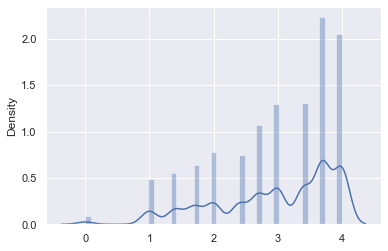

In [24]:
sns.set_theme(); np.random.seed(0)
ax = sns.distplot(Predictors)

### Significance of Features - P_Value

In [25]:
X_incl_const = sm.add_constant(Predictors)

alternate_model = sm.OLS(target, X_incl_const)
results = alternate_model.fit()
#Finding p-values
features_P_value = pd.DataFrame({'p-value': round(results.pvalues, 3)})
features_P_value = features_P_value[features_P_value<0.05]

#dropping insignificant p values. All the listed values have significant features. 
features_P_value=features_P_value.dropna()
features_P_value

,p-value
PH-121,0.000
HS-101,0.000
CY-105,0.000
HS-105/12,0.009
CS-105,0.000
CS-106,0.000
EL-102,0.000
EE-119,0.027
ME-107,0.000
CS-107,0.044


#### NOTE :

## 2. Implementation of Models.

# Model 1

In [26]:
Predictor_M1=Predictors.iloc[0:571,0:11] #Slicing
target=data["CGPA"]
Predictor_M1.head(3) # Only 1st year Grades. 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7


### Algorithm no. 01 - Linear Regression

In [27]:
X_train_M1_lr,X_test_M1_lr,Y_train_M1_lr,Y_test_M1_lr = train_test_split(Predictor_M1, target,test_size=0.2,random_state=0) # Implementing 80 and 20 split
r1=LinearRegression()
r1.fit(X_train_M1_lr,Y_train_M1_lr)
print("The training accuracy", r1.score(X_train_M1_lr,Y_train_M1_lr))
print("The testing accuracy",r1.score(X_test_M1_lr,Y_test_M1_lr))


The training accuracy 0.8397211612644767
The testing accuracy 0.8141336830277863


### Algorithm no. 02 - Regression Tree

In [28]:
X_train, X_test, y_train, y_test = train_test_split(Predictor_M1, target, test_size=0.3)
rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)
model_r = rt.fit(X_train, y_train)
y_test_pred = model_r.predict(X_test)
y_train_pred = model_r.predict(X_train)
print('R Squared Score of train is:', r2_score(y_train, y_train_pred))
print('R Squared Score of test is:', r2_score(y_test, y_test_pred))


R Squared Score of train is: 0.8555017027699763
R Squared Score of test is: 0.6493552561417582


C:\Users\GHAZIA HASHMI\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


### Algorithm no. 03 - ANN

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Predictor_M1, target, test_size=0.2)
model=models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_error','mean_squared_error'])
history = model.fit(X_train,y_train,epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
46/46 [==============================] - 2s 11ms/step - loss: 0.5949 - mean_absolute_error: 0.5299 - mean_squared_error: 0.5949 - val_loss: 0.1674 - val_mean_absolute_error: 0.2965 - val_mean_squared_error: 0.1674
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0729 - mean_absolute_error: 0.2101 - mean_squared_error: 0.0729 - val_loss: 0.1269 - val_mean_absolute_error: 0.2596 - val_mean_squared_error: 0.1269
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0621 - mean_absolute_error: 0.1960 - mean_squared_error: 0.0621 - val_loss: 0.1215 - val_mean_absolute_error: 0.2463 - val_mean_squared_error: 0.1215
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0590 - mean_absolute_error: 0.1912 - mean_squared_error: 0.0590 - val_loss: 0.1268 - val_mean_absolute_error: 0.2618 - val_mean_squared_error: 0.1268
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0541 - mean_absolute_err

46/46 [==============================] - 0s 4ms/step - loss: 0.0401 - mean_absolute_error: 0.1564 - mean_squared_error: 0.0401 - val_loss: 0.1087 - val_mean_absolute_error: 0.2403 - val_mean_squared_error: 0.1087
Epoch 38/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0462 - mean_absolute_error: 0.1699 - mean_squared_error: 0.0462 - val_loss: 0.1042 - val_mean_absolute_error: 0.2299 - val_mean_squared_error: 0.1042
Epoch 39/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0419 - mean_absolute_error: 0.1610 - mean_squared_error: 0.0419 - val_loss: 0.1022 - val_mean_absolute_error: 0.2136 - val_mean_squared_error: 0.1022
Epoch 40/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0393 - mean_absolute_error: 0.1568 - mean_squared_error: 0.0393 - val_loss: 0.1136 - val_mean_absolute_error: 0.2439 - val_mean_squared_error: 0.1136
Epoch 41/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0415 - mean_absolute_error: 0.162

46/46 [==============================] - 0s 3ms/step - loss: 0.0352 - mean_absolute_error: 0.1476 - mean_squared_error: 0.0352 - val_loss: 0.1011 - val_mean_absolute_error: 0.2075 - val_mean_squared_error: 0.1011
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0358 - mean_absolute_error: 0.1485 - mean_squared_error: 0.0358 - val_loss: 0.1050 - val_mean_absolute_error: 0.2305 - val_mean_squared_error: 0.1050
Epoch 75/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0351 - mean_absolute_error: 0.1481 - mean_squared_error: 0.0351 - val_loss: 0.1035 - val_mean_absolute_error: 0.2098 - val_mean_squared_error: 0.1035
Epoch 76/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0303 - mean_absolute_error: 0.1371 - mean_squared_error: 0.0303 - val_loss: 0.1043 - val_mean_absolute_error: 0.2045 - val_mean_squared_error: 0.1043
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0368 - mean_absolute_error: 0.150

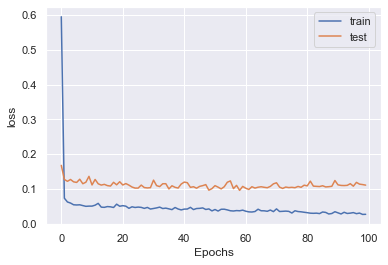

In [30]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

In [31]:
test_predictions=model.predict(X_test)
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1105 - mean_absolute_error: 0.2332 - mean_squared_error: 0.1105


[0.11054150760173798, 0.23321835696697235, 0.11054150760173798]

### Algorithm no. 04 - Polynomial Regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(Predictor_M1, target, test_size=0.2, random_state=10)
deg=2 # Degree 9 is giving the error of insufficient memory
X_train_poly2=PolynomialFeatures(degree=deg).fit_transform(X_train)
X_train_poly2=pd.DataFrame(X_train_poly2)
X_train_poly2=X_train_poly2.drop([0],axis=1)
model5=LinearRegression()
model5.fit(X_train_poly2,y_train)

print('Training data r-square:', model5.score(X_train_poly2, y_train))
X_test_poly2=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly2=pd.DataFrame(X_test_poly2)
X_test_poly2=X_test_poly2.drop([0],axis=1)
print('Test data r-square:', model5.score(X_test_poly2, y_test))
# print('Number of non-zero features:',np.sum(model5.coef_ != 0))

Training data r-square: 0.9083469239333102
Test data r-square: 0.7920203718492711


# Model 2

In [33]:
Predictor_M2=Predictors.iloc[0:571,0:22] #Slicing
Predictor_M2 # Only 1st & 2nd year Grades. 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,2.7,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,4.0,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.7
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,2.4,3.7,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
568,3.0,4.0,3.7,3.4,4.0,4.0,4.0,4.0,4.0,3.0,...,3.0,3.4,3.0,3.7,4.0,3.4,3.0,4.0,3.4,3.0
569,4.0,3.4,1.0,4.0,1.0,1.4,2.7,1.7,2.7,1.7,...,1.0,1.0,3.0,2.7,3.0,2.7,2.0,2.7,1.4,1.4


### Algorithm no. 01 - Linear Regression

In [34]:
X_train_M2_lr,X_test_M2_lr,Y_train_M2_lr,Y_test_M2_lr = train_test_split(Predictor_M2, target,test_size=0.2,random_state=0) # Implementing 80 and 20 split
r2=LinearRegression()
r2.fit(X_train_M2_lr,Y_train_M2_lr)
print("The training accuracy", r2.score(X_train_M2_lr,Y_train_M2_lr))
print("The testing accuracy",r2.score(X_test_M2_lr,Y_test_M2_lr))

The training accuracy 0.9088336931042303
The testing accuracy 0.9066851498286942


### Algorithm no. 02 - Regression Tree

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Predictor_M2, target, test_size=0.3)
rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)
model_r = rt.fit(X_train, y_train)
y_test_pred = model_r.predict(X_test)
y_train_pred = model_r.predict(X_train)
print('R Squared Score of train is:', r2_score(y_train, y_train_pred))
print('R Squared Score of test is:', r2_score(y_test, y_test_pred))

R Squared Score of train is: 0.9234281666373136
R Squared Score of test is: 0.6772627247267109


C:\Users\GHAZIA HASHMI\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


### Algorithm no. 03 - ANN

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Predictor_M1, target, test_size=0.2)
model=models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_error','mean_squared_error'])
history = model.fit(X_train,y_train,epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
46/46 [==============================] - 1s 10ms/step - loss: 1.0084 - mean_absolute_error: 0.6825 - mean_squared_error: 1.0084 - val_loss: 0.1073 - val_mean_absolute_error: 0.2368 - val_mean_squared_error: 0.1073
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0811 - mean_absolute_error: 0.2284 - mean_squared_error: 0.0811 - val_loss: 0.0855 - val_mean_absolute_error: 0.2158 - val_mean_squared_error: 0.0855
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0637 - mean_absolute_error: 0.1992 - mean_squared_error: 0.0637 - val_loss: 0.0792 - val_mean_absolute_error: 0.2031 - val_mean_squared_error: 0.0792
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0583 - mean_absolute_error: 0.1911 - mean_squared_error: 0.0583 - val_loss: 0.0749 - val_mean_absolute_error: 0.2022 - val_mean_squared_error: 0.0749
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0556 - mean_absolute_err

46/46 [==============================] - 0s 3ms/step - loss: 0.0342 - mean_absolute_error: 0.1415 - mean_squared_error: 0.0342 - val_loss: 0.0791 - val_mean_absolute_error: 0.1986 - val_mean_squared_error: 0.0791
Epoch 38/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0351 - mean_absolute_error: 0.1466 - mean_squared_error: 0.0351 - val_loss: 0.0953 - val_mean_absolute_error: 0.2412 - val_mean_squared_error: 0.0953
Epoch 39/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_absolute_error: 0.1634 - mean_squared_error: 0.0439 - val_loss: 0.0838 - val_mean_absolute_error: 0.1968 - val_mean_squared_error: 0.0838
Epoch 40/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0378 - mean_absolute_error: 0.1475 - mean_squared_error: 0.0378 - val_loss: 0.0914 - val_mean_absolute_error: 0.2334 - val_mean_squared_error: 0.0914
Epoch 41/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0333 - mean_absolute_error: 0.141

46/46 [==============================] - 0s 3ms/step - loss: 0.0287 - mean_absolute_error: 0.1292 - mean_squared_error: 0.0287 - val_loss: 0.0850 - val_mean_absolute_error: 0.2120 - val_mean_squared_error: 0.0850
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0263 - mean_absolute_error: 0.1263 - mean_squared_error: 0.0263 - val_loss: 0.0997 - val_mean_absolute_error: 0.2194 - val_mean_squared_error: 0.0997
Epoch 75/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0263 - mean_absolute_error: 0.1249 - mean_squared_error: 0.0263 - val_loss: 0.0796 - val_mean_absolute_error: 0.2034 - val_mean_squared_error: 0.0796
Epoch 76/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0266 - mean_absolute_error: 0.1214 - mean_squared_error: 0.0266 - val_loss: 0.0772 - val_mean_absolute_error: 0.2079 - val_mean_squared_error: 0.0772
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0284 - mean_absolute_error: 0.128

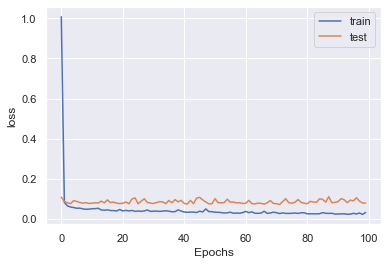

In [37]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

In [38]:
test_predictions=model.predict(X_test)
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0780 - mean_absolute_error: 0.2000 - mean_squared_error: 0.0780


[0.07800900191068649, 0.19995653629302979, 0.07800900191068649]

### Algorithm no. 04 - Polynomial Regression

In [39]:
X_train, X_test, y_train, y_test = train_test_split(Predictor_M2, target, test_size=0.2, random_state=0)
deg=2 # Degree 9 is giving the error of insufficient memory
X_train_poly2=PolynomialFeatures(degree=deg).fit_transform(X_train)
X_train_poly2=pd.DataFrame(X_train_poly2)
X_train_poly2=X_train_poly2.drop([0],axis=1)
model5=LinearRegression()
model5.fit(X_train_poly2,y_train)

print('Training data r-square:', model5.score(X_train_poly2, y_train))
X_test_poly2=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly2=pd.DataFrame(X_test_poly2)
X_test_poly2=X_test_poly2.drop([0],axis=1)
print('Test data r-square:', model5.score(X_test_poly2, y_test))
# print('Number of non-zero features:',np.sum(model5.coef_ != 0))

Training data r-square: 0.9856203584476515
Test data r-square: 0.6987373033798243


# Model 3

In [40]:
Predictor_M3=Predictors.iloc[0:571,0:34]#Slicing
Predictor_M3=Predictor_M3.drop("MT-442", axis=1)
Predictor_M3.head(3)# Only 1st, 2nd & 3rd year Grades.

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,2.4,3.0,2.0,2.4,2.0,1.7,2.0,1.7,1.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.7,3.7,1.4,1.7,2.0,3.7,1.0,1.4,1.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,2.4,4.0,3.4,3.7,3.0,3.4,3.7,3.7,3.0,3.0


### Algorithm no. 01 - Linear Regression

In [41]:
X_train_M3_lr,X_test_M3_lr,Y_train_M3_lr,Y_test_M3_lr = train_test_split(Predictor_M3, target,test_size=0.2,random_state=5) # Implementing 80 and 20 split
r3=LinearRegression()
r3.fit(X_train_M3_lr,Y_train_M3_lr)
print("The training accuracy", r3.score(X_train_M3_lr,Y_train_M3_lr))
print("The testing accuracy",r3.score(X_test_M3_lr,Y_test_M3_lr))

The training accuracy 0.9380411174884866
The testing accuracy 0.9321933295381652


### Algorithm no. 02 - Regression Tree

In [42]:
X_train, X_test, y_train, y_test = train_test_split(Predictor_M3, target, test_size=0.3)
rt = DecisionTreeRegressor(criterion = 'mse', max_depth=5)
model_r = rt.fit(X_train, y_train)
y_test_pred = model_r.predict(X_test)
y_train_pred = model_r.predict(X_train)

print('R Squared Score (train) is:', r2_score(y_train, y_train_pred))
print('R Squared Score (test) is:', r2_score(y_test, y_test_pred))


R Squared Score (train) is: 0.9235389877033965
R Squared Score (test) is: 0.8204944893070616


C:\Users\GHAZIA HASHMI\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


### Algorithm no. 03 - ANN

In [43]:
X_train, X_test, y_train, y_test = train_test_split(Predictor_M1, target, test_size=0.2)
model=models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_error','mean_squared_error'])
history = model.fit(X_train,y_train,epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
46/46 [==============================] - 1s 8ms/step - loss: 1.0535 - mean_absolute_error: 0.6681 - mean_squared_error: 1.0535 - val_loss: 0.1158 - val_mean_absolute_error: 0.2440 - val_mean_squared_error: 0.1158
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.0806 - mean_absolute_error: 0.2191 - mean_squared_error: 0.0806 - val_loss: 0.0851 - val_mean_absolute_error: 0.1959 - val_mean_squared_error: 0.0851
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0698 - mean_absolute_error: 0.2066 - mean_squared_error: 0.0698 - val_loss: 0.0803 - val_mean_absolute_error: 0.1963 - val_mean_squared_error: 0.0803
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0677 - mean_absolute_error: 0.2034 - mean_squared_error: 0.0677 - val_loss: 0.0879 - val_mean_absolute_error: 0.1923 - val_mean_squared_error: 0.0879
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0616 - mean_absolute_erro

46/46 [==============================] - 0s 3ms/step - loss: 0.0428 - mean_absolute_error: 0.1615 - mean_squared_error: 0.0428 - val_loss: 0.0728 - val_mean_absolute_error: 0.1840 - val_mean_squared_error: 0.0728
Epoch 38/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0444 - mean_absolute_error: 0.1617 - mean_squared_error: 0.0444 - val_loss: 0.0718 - val_mean_absolute_error: 0.1850 - val_mean_squared_error: 0.0718
Epoch 39/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0424 - mean_absolute_error: 0.1598 - mean_squared_error: 0.0424 - val_loss: 0.0690 - val_mean_absolute_error: 0.1802 - val_mean_squared_error: 0.0690
Epoch 40/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0422 - mean_absolute_error: 0.1608 - mean_squared_error: 0.0422 - val_loss: 0.0692 - val_mean_absolute_error: 0.1922 - val_mean_squared_error: 0.0692
Epoch 41/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0415 - mean_absolute_error: 0.157

46/46 [==============================] - 0s 3ms/step - loss: 0.0297 - mean_absolute_error: 0.1330 - mean_squared_error: 0.0297 - val_loss: 0.0750 - val_mean_absolute_error: 0.1869 - val_mean_squared_error: 0.0750
Epoch 74/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0297 - mean_absolute_error: 0.1344 - mean_squared_error: 0.0297 - val_loss: 0.0838 - val_mean_absolute_error: 0.1996 - val_mean_squared_error: 0.0838
Epoch 75/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0370 - mean_absolute_error: 0.1480 - mean_squared_error: 0.0370 - val_loss: 0.0763 - val_mean_absolute_error: 0.1972 - val_mean_squared_error: 0.0763
Epoch 76/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0363 - mean_absolute_error: 0.1510 - mean_squared_error: 0.0363 - val_loss: 0.0785 - val_mean_absolute_error: 0.1964 - val_mean_squared_error: 0.0785
Epoch 77/100
46/46 [==============================] - 0s 3ms/step - loss: 0.0296 - mean_absolute_error: 0.135

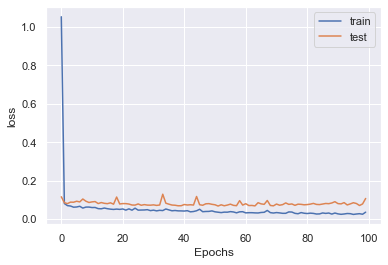

In [44]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

In [45]:
test_predictions=model.predict(X_test)
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1070 - mean_absolute_error: 0.2255 - mean_squared_error: 0.1070


[0.10695356875658035, 0.2254570722579956, 0.10695356875658035]

### Algorithm no. 04 - Polynomial Regression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Predictor_M3, target, test_size=0.2, random_state=10)
deg=3 # Degree 9 is giving the error of insufficient memory
X_train_poly2=PolynomialFeatures(degree=deg).fit_transform(X_train)
X_train_poly2=pd.DataFrame(X_train_poly2)
X_train_poly2=X_train_poly2.drop([0],axis=1)
model5=LinearRegression()
model5.fit(X_train_poly2,y_train)

print('Training data r-square:', model5.score(X_train_poly2, y_train))
X_test_poly2=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly2=pd.DataFrame(X_test_poly2)
X_test_poly2=X_test_poly2.drop([0],axis=1)
print('Test data r-square:', model5.score(X_test_poly2, y_test))
# print('Number of non-zero features:',np.sum(model5.coef_ != 0))

Training data r-square: 1.0
Test data r-square: 0.9163391295658292


## A Dashboard based working interface.

In [47]:
#imports 
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output

In [48]:
# Student information block
file = open("reportcard.jpg", "rb")
image = file.read()

image_headline = widgets.Image(
                    value=image,
                    format='jpg',
                    width='200',
                    height='300'
                )

label_headline = widgets.Label(
                    style={'description_width': 'initial'},
                    value='WELCOME TO CGPA PREDICTION MODEL'
                )

Student_Name=widgets.Text(
    placeholder='Enter Full Name',
    description='Name:',
    disabled=False
)

Seat_No=widgets.Text(
    placeholder='Enter Seat No',
    description='Seat No:',
    disabled=False
)

Student_Year=widgets.Dropdown(
    options=['1st year', '1st & 2nd year', '1st, 2nd & 3rd year'],
    value=None,
    description='Year:',
    disabled=False,
)
vbox_headline = widgets.VBox([image_headline, label_headline,Student_Name,Seat_No,Student_Year])
display(vbox_headline)

In [49]:
enco_list=[('A+', 4.0), ('A', 4.0), ('A-',3.7), ('B+',3.4), ('B',3.0), ('B-',2.7), ('C+',2.4), ('C',2.0), ('C-',1.7),('D+',1.4), ('D',1.0), ('F',0.0), ('WU',0.0), ('W',0.0), ('I',0.0)]

print("Please Click the 'Fill Grades' Button to fill your", Student_Year.value, "Grades")
button_send = widgets.Button(
                description='Fill Grades',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
            if Student_Year.value=='1st year':
                print("        **** First Year Courses ******     ")
                PH_121=widgets.Dropdown(
                options=enco_list,
                description='PH-121',
                )
                HS_101=widgets.Dropdown(
                    options=enco_list,
                    description='HS-101',
                )   
                CY_105=widgets.Dropdown(
                    options=enco_list,
                    description='CY-105',
                )   
                HS_105_12=widgets.Dropdown(
                    options=enco_list,
                    description='HS_105/12',
                )   
                MT_111=widgets.Dropdown(
                    options=enco_list,
                    description='MT-111',
                )   
                CS_105=widgets.Dropdown(
                options=enco_list,
                description='CS-105',
                )   
                CS_106=widgets.Dropdown(
                    options=enco_list,
                    description='CS-106',
                )
                EL_102=widgets.Dropdown(
                    options=enco_list,
                    description='EL-102',
                )   
                EE_119=widgets.Dropdown(
                    options=enco_list,
                    description='EE-119',
                )   
                ME_107=widgets.Dropdown(
                    options=enco_list,
                    description='ME-107',
                )
                CS_107=widgets.Dropdown(
                    options=enco_list,
                    description='CS-107',
                )
                vboxM1_text = widgets.VBox([PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106, EL_102, EE_119, ME_107, CS_107])
                display(vboxM1_text)

            elif Student_Year.value=='1st & 2nd year':
                print("        **** First Year Courses ******     ")
                PH_121=widgets.Dropdown(
                options=enco_list,
                description='PH-121',
                )
                HS_101=widgets.Dropdown(
                    options=enco_list,
                    description='HS-101',
                )   
                CY_105=widgets.Dropdown(
                    options=enco_list,
                    description='CY-105',
                )   
                HS_105_12=widgets.Dropdown(
                    options=enco_list,
                    description='HS_105/12',
                )   
                MT_111=widgets.Dropdown(
                    options=enco_list,
                    description='MT-111',
                )   
                CS_105=widgets.Dropdown(
                    options=enco_list,
                    description='CS-105',
                )   
                CS_106=widgets.Dropdown(
                    options=enco_list,
                    description='CS-106',
                )
                EL_102=widgets.Dropdown(
                    options=enco_list,
                    description='EL-102',
                )   
                EE_119=widgets.Dropdown(
                    options=enco_list,
                    description='EE-119',
                )   
                ME_107=widgets.Dropdown(
                    options=enco_list,
                    description='ME-107',
                )
                CS_107=widgets.Dropdown(
                    options=enco_list,
                    description='CS-107',
                )
                print("        **** Second Year Courses ******     ")
                HS_205_20=widgets.Dropdown(
                    options=enco_list,
                    description='HS-205/20',
                )
                MT_222=widgets.Dropdown(
                    options=enco_list,
                    description='MT-222',
                )
                EE_222=widgets.Dropdown(
                    options=enco_list,
                    description='EE-222',
                )
                MT_224=widgets.Dropdown(
                    options=enco_list,
                    description='MT-224',
                )
                CS_210=widgets.Dropdown(
                    options=enco_list,
                    description='CS-210',
                )
                CS_211=widgets.Dropdown(
                    options=enco_list,
                    description='CS-211',
                )
                CS_203=widgets.Dropdown(
                    options=enco_list,
                    description='CS-203',
                )
                CS_214=widgets.Dropdown(
                    options=enco_list,
                    description='CS-214',
                )
                EE_217=widgets.Dropdown(
                    options=enco_list,
                    description='EE-217',
                )
                CS_212=widgets.Dropdown(
                    options=enco_list,
                    description='CS-212',
                )
                CS_215=widgets.Dropdown(
                    options=enco_list,
                    description='CS-215',
                ) 
                vboxM2_text = widgets.VBox([PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106, EL_102, EE_119, ME_107,CS_107, HS_205_20,MT_222,EE_222,MT_224,CS_210,CS_211,CS_203,CS_214,EE_217,CS_212,CS_215])
                display(vboxM2_text)

            if Student_Year.value=='1st, 2nd & 3rd year':
                print("        **** First Year Courses ******     ")
                PH_121=widgets.Dropdown(
                options=enco_list,
                description='PH-121',
                )
                HS_101=widgets.Dropdown(
                    options=enco_list,
                    description='HS-101',
                )   
                CY_105=widgets.Dropdown(
                    options=enco_list,
                    description='CY-105',
                )   
                HS_105_12=widgets.Dropdown(
                    options=enco_list,
                    description='HS_105/12',
                )   
                MT_111=widgets.Dropdown(
                    options=enco_list,
                    description='MT-111',
                )   
                CS_105=widgets.Dropdown(
                options=enco_list,
                description='CS-105',
                )   
                CS_106=widgets.Dropdown(
                    options=enco_list,
                    description='CS-106',
                )
                EL_102=widgets.Dropdown(
                    options=enco_list,
                    description='EL-102',
                )   
                EE_119=widgets.Dropdown(
                    options=enco_list,
                    description='EE-119',
                )   
                ME_107=widgets.Dropdown(
                    options=enco_list,
                    description='ME-107',
                )
                CS_107=widgets.Dropdown(
                    options=enco_list,
                    description='CS-107',
                )
                print("        **** Second Year Courses ******     ")
                HS_205_20=widgets.Dropdown(
                    options=enco_list,
                    description='HS-205/20',
                )
                MT_222=widgets.Dropdown(
                    options=enco_list,
                    description='MT-222',
                )
                EE_222=widgets.Dropdown(
                    options=enco_list,
                    description='EE-222',
                )
                MT_224=widgets.Dropdown(
                    options=enco_list,
                    description='MT-224',
                )
                CS_210=widgets.Dropdown(
                    options=enco_list,
                    description='CS-210',
                )
                CS_211=widgets.Dropdown(
                    options=enco_list,
                    description='CS-211',
                )
                CS_203=widgets.Dropdown(
                    options=enco_list,
                    description='CS-203',
                )
                CS_214=widgets.Dropdown(
                    options=enco_list,
                    description='CS-214',
                )
                EE_217=widgets.Dropdown(
                    options=enco_list,
                    description='EE-217',
                )
                CS_212=widgets.Dropdown(
                    options=enco_list,
                    description='CS-212',
                )
                CS_215=widgets.Dropdown(
                    options=enco_list,
                    description='CS-215',
                ) 
                print("        **** Third Year Courses ******     ")
                MT_331=widgets.Dropdown(
                    options=enco_list,
                    description='MT-331',
                ) 
                EF_303=widgets.Dropdown(
                    options=enco_list,
                    description='EF-303',
                ) 
                HS_304=widgets.Dropdown(
                    options=enco_list,
                    description='HS-304',
                ) 
                CS_301=widgets.Dropdown(
                    options=enco_list,
                    description='CS-301',
                ) 
                CS_302=widgets.Dropdown(
                    options=enco_list,
                    description='CS-302',
                ) 
                TC_383=widgets.Dropdown(
                    options=enco_list,
                    description='TC-383',
                )
                EL_332=widgets.Dropdown(
                    options=enco_list,
                    description='EL-332',
                )
                CS_318=widgets.Dropdown(
                    options=enco_list,
                    description='CS-318',
                )
                CS_306=widgets.Dropdown(
                    options=enco_list,
                    description='CS-306',
                )
                CS_312=widgets.Dropdown(
                    options=enco_list,
                    description='CS-312',
                )
                CS_317=widgets.Dropdown(
                    options=enco_list,
                    description='CS-317',
                )

                vboxM3_text = widgets.VBox([PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106, EL_102, EE_119, ME_107,CS_107, HS_205_20,MT_222,EE_222,MT_224,CS_210,CS_211,CS_203,CS_214,EE_217,CS_212,CS_215,MT_331,EF_303,HS_304,CS_301,CS_302,TC_383,EL_332,CS_318,CS_306,CS_312,CS_317])
                display(vboxM3_text)
            
            print("Please Click the 'Submit Grades' Button to submit your Grades")
            button_send_G = widgets.Button(
                            description='Submit Grades',
                            tooltip='Send',
                            style={'description_width': 'initial'}
                        )

            output_G = widgets.Output()

            def on_button_clicked(event):
                with output_G:
                    clear_output()
                    grade_list1=[]
                    grade_list2=[]
                    grade_list3=[]
                    if Student_Year.value=='1st year':
                        for element in [PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106, EL_102, EE_119, ME_107, CS_107]:
                            grade_list1.append(element.value)
                        print('Following is your GPAs of the grades submitted')
                        print(', '.join(map(str, grade_list1)))
                        print('\n')
                        print("Please Click the 'Predict CGPA' Button to display your CGPA")

                    if Student_Year.value=='1st & 2nd year':
                        for element in [PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106, EL_102, EE_119, ME_107,CS_107, HS_205_20,MT_222,EE_222,MT_224,CS_210,CS_211,CS_203,CS_214,EE_217,CS_212,CS_215]:
                            grade_list2.append(element.value)
                        print('Following is your GPAs of the grades submitted')
                        print(', '.join(map(str, grade_list2)))
                        print('\n')
                        print("Please Click the 'Predict CGPA' Button to display your CGPA")

                    if Student_Year.value=='1st, 2nd & 3rd year':
                        for element in [PH_121, HS_101, CY_105, HS_105_12, MT_111, CS_105, CS_106, EL_102, EE_119, ME_107,CS_107, HS_205_20,MT_222,EE_222,MT_224,CS_210,CS_211,CS_203,CS_214,EE_217,CS_212,CS_215,MT_331,EF_303,HS_304,CS_301,CS_302,TC_383,EL_332,CS_318,CS_306,CS_312,CS_317]:
                            grade_list3.append(element.value)
                        print('Following is your GPAs of the grades submitted')
                        print(', '.join(map(str, grade_list3)))
                        print('\n')
                        print("Please Click the 'Predict CGPA' Button to display your CGPA")

                    button_send_P = widgets.Button(
                                    description='Predict CGPA',
                                    tooltip='Send',
                                    style={'description_width': 'initial'}
                                )
                    output_P = widgets.Output()

                    def on_button_clicked(event):
                        with output_P:
                            clear_output()
                            if Student_Year.value=='1st year':
                                lst1=[]
                                lst1.append(grade_list1)
                                df1 = pd.DataFrame (lst1, columns = ['PH-121', 'HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107', 'CS-107'])
                                y_pred1 = r1.predict(df1)
                                print("The Predicted CGPA of",Student_Name.value, ',',Seat_No.value,"on the basis of",Student_Year.value,"is"  ,round(y_pred1[0], 2))

                            if Student_Year.value=='1st & 2nd year':
                                lst2=[]
                                lst2.append(grade_list2)
                                df2 = pd.DataFrame (lst2, columns = ['PH-121', 'HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107','HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215'])
                                y_pred1 = r2.predict(df2)
#                                 print(y_pred1[0])
                                print("The Predicted CGPA of",Student_Name.value, ',',Seat_No.value,"on the basis of",Student_Year.value,"is"  ,round(y_pred1[0],2))

                            if Student_Year.value=='1st, 2nd & 3rd year':
                                lst3=[]
                                lst3.append(grade_list3)
                                df3 = pd.DataFrame (lst3, columns = ['PH-121', 'HS-101','CY-105','HS-105/12','MT-111','CS-105','CS-106','EL-102','EE-119','ME-107','CS-107','HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214','EE-217','CS-212','CS-215','MT-331','EF-303','HS-304','CS-301','CS-302','TC-383','EL-332','CS-318','CS-306','CS-312','CS-317'])
                                y_pred1 = r3.predict(df3)
#                                 print(y_pred1[0])
                                print("The Predicted CGPA of",Student_Name.value, ',',Seat_No.value,"on the basis of",Student_Year.value,"is"  ,round(y_pred1[0],2))

########################### third button for confirming info ############################

                    button_send_P.on_click(on_button_clicked)

                    vbox_result_P = widgets.VBox([button_send_P, output_P])
                    display(vbox_result_P)
                    

########################### second button for confirming info ############################
            button_send_G.on_click(on_button_clicked)

            vbox_result_G = widgets.VBox([button_send_G, output_G])
            display(vbox_result_G)
            

########################### first button for confirming info ############################

button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])
display(vbox_result)

Please Click the 'Fill Grades' Button to fill your 1st & 2nd year Grades


In [50]:
import pickle
# import dill as pickle
#pickling
data = {"model1": r1,"model2": r2,"model3": r3}

with open('interface.pkl', 'wb') as file:
    pickle.dump(data, file)
with open('interface.pkl', 'rb') as file:
    data = pickle.load(file)